# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 04**: Data Unions & Joins Pipeline

**Date**: September 23rd 2025

**Student Name**: Luis Angel Santana Hernandez

**Professor**: Pablo Camarillo Ramirez

In [286]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on SparkSQL") \
    .master("spark://4dcc0176a67d:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

In [287]:
# Build schema
from luis_santana.spark_utils import SparkUtils
# Import your module

schema_agencies = SparkUtils.generate_schema([("agency_id", "int"), ("agency_info", "string")])

df_agencies = spark.read.schema(schema_agencies).option("header", "True").csv("/opt/spark/work-dir/data/car_service/agencies")
#df_agencies.show(truncate=False)


In [288]:
schema_brands = SparkUtils.generate_schema([("brand_id", "int"), ("brand_infos", "string")])
df_brands = spark.read.schema(schema_brands).option("header", "True").csv("/opt/spark/work-dir/data/car_service/brands")
#df_brands.show(truncate=False)

In [289]:
schema_cars = SparkUtils.generate_schema([("car_id", "int"), ("car_info", "string")])
df_cars = spark.read.schema(schema_cars).option("header", "True").csv("/opt/spark/work-dir/data/car_service/cars")
#df_cars.show(truncate=False)

In [290]:
schema_customers = SparkUtils.generate_schema([("customer_id", "int"), ("customer_info", "string")])
df_customers = spark.read.schema(schema_customers).option("header", "True").csv("/opt/spark/work-dir/data/car_service/customers")
#df_customers.show(truncate=False)

In [291]:
schema_rentals = SparkUtils.generate_schema([("rental_id", "int"),("rental_info", "string")])
df_rentals = spark.read.schema(schema_rentals).option("header", "True").csv("/opt/spark/work-dir/data/car_service/rentals")
#df_rentals.show(truncate=False)


# Json Colums

In [ ]:
from pyspark.sql.functions import get_json_object


# agency_df = df_agencies.withColumn("agency_name",get_json_object("agency_info","$.agency_name")) \
#     .withColumn("city",get_json_object("agency_info","$.city")) 
# agency_df = agency_df.drop("agency_info")


In [ ]:
# brands_df = df_brands.withColumn("brand_name",get_json_object("brand_infos","$.brand_name")) \
#     .withColumn("country",get_json_object("brand_infos","$.country"))\
#     .select("brand_id","brand_name","country")


In [ ]:
# cars_df = df_cars.withColumn("car_name",get_json_object("car_info","$.car_name")) \
#     .withColumn("brand_id",get_json_object("car_info","$.brand_id").cast("int")) \
#     .withColumn("price_per_day",get_json_object("car_info","$.price_per_day").cast("int")) \
#     .select("car_id","car_name","brand_id","price_per_day")


In [ ]:
# customer_df = df_customers.withColumn("customer_name",get_json_object("customer_info","$.customer_name")) \
#     .withColumn("age",get_json_object("customer_info","$.age")) \
#     .withColumn("city",get_json_object("customer_info","$.city"))\
#     .select("customer_id","customer_name","age","city")



In [ ]:
# rental_df = df_rentals.withColumn("car_id",get_json_object("rental_info","$.car_id").cast("int")) \
#     .withColumn("customer_id",get_json_object("rental_info","$.customer_id").cast("int")) \
#     .withColumn("agency_id",get_json_object("rental_info","$.agency_id").cast("int"))\
#     .select("rental_id","car_id","customer_id","agency_id")


## join data

In [ ]:
# data_car = cars_df.select("car_id","car_name")
# data_customer = customer_df.select("customer_id","customer_name")
# data_agency = agency_df.select("agency_id","agency_name")



In [298]:
# info = rental_df.join(data_car, on="car_id", how="left")\
#     .join(data_customer,on="customer_id", how="left")\
#     .join(data_agency, on="agency_id", how="left")\
#     .select("rental_id","car_name","customer_name","agency_name")

# info.show(truncate=False)

# the lazy way (optimising and not using show until the end for it to do it in only one action) 

ps: ambos modelos son lazy pero este esta mas optimisado ya que no saco valores que no son necesarios

(Commentar uno, si se va a suar el otro)

In [299]:
lazy_agency = df_agencies.withColumn("agency_name",get_json_object("agency_info","$.agency_name"))\
    .select("agency_id","agency_name")

lazy_car = df_cars.withColumn("car_name",get_json_object("car_info","$.car_name"))\
    .select("car_id","car_name")

lazy_customer = df_customers.withColumn("customer_name",get_json_object("customer_info","$.customer_name"))\
    .select("customer_id","customer_name")

lazy_rental = df_rentals.withColumn("car_id",get_json_object("rental_info","$.car_id")) \
    .withColumn("customer_id",get_json_object("rental_info","$.customer_id")) \
    .withColumn("agency_id",get_json_object("rental_info","$.agency_id"))\
    .select("rental_id","car_id","customer_id","agency_id")

final_lazy = lazy_rental.join(lazy_car, on="car_id", how="left") \
                                .join(lazy_customer, on="customer_id", how="left") \
                                .join(lazy_agency, on="agency_id", how="left") \
                                .drop("agency_id", "customer_id", "car_id")

#lazy_agency.show(truncate=False)
#lazy_car.show(truncate=False)
#lazy_customer.show(truncate=False)
#lazy_rental.show(truncate=False)

        

In [300]:
final_lazy.show(truncate=False)

+---------+-----------------------------------+---------------+-------------+
|rental_id|car_name                           |customer_name  |agency_name  |
+---------+-----------------------------------+---------------+-------------+
|11891    |Wallace-Carlson Model 9            |Margaret Jones |NYC Rentals  |
|11892    |Grimes-Green Model 8               |Albert Williams|LA Car Rental|
|11893    |Stewart-Allen Model 5              |Caleb Fleming  |SF Cars      |
|11894    |Campos PLC Model 4                 |Andrew Butler  |NYC Rentals  |
|11895    |Wagner LLC Model 1                 |Kristin Potts  |SF Cars      |
|11896    |Jones, Jefferson and Rivera Model 7|Jeremy Parks   |LA Car Rental|
|11897    |Lopez and Sons Model 9             |Terry Wells    |Zapopan Auto |
|11898    |Salazar Ltd Model 8                |Marc Williams  |SF Cars      |
|11899    |Villanueva PLC Model 7             |Danny Williams |LA Car Rental|
|11900    |Faulkner-Howard Model 5            |Eric Owens PhD |S

# Persist Data

In [301]:
base_path = "/opt/spark/work-dir/data/"

In [302]:
!pwd

/opt/spark/work-dir


In [303]:
!du -sh ./data/car_service/rentals/

1.1M	./data/car_service/rentals/


In [304]:
final_lazy.write \
            .mode("overwrite") \
            .parquet(base_path + "car_service/output/parquet")

In [305]:
!ls data/car_service/output/parquet/

part-00000-c8762046-09aa-4a0c-81db-1f971cb20c76-c000.snappy.parquet  _SUCCESS
part-00001-c8762046-09aa-4a0c-81db-1f971cb20c76-c000.snappy.parquet


In [306]:
!du -sh ./data/car_service/output/parquet/

124K	./data/car_service/output/parquet/


## Parquet file

In [307]:
final_lazy.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .parquet(base_path + "car_service/output/parquet2")

In [308]:
!ls data/car_service/output/parquet2/

'agency_name=LA Car Rental'  'agency_name=SF Cars'	  _SUCCESS
'agency_name=NYC Rentals'    'agency_name=Zapopan Auto'


In [309]:
!du -sh ./data/car_service/output/parquet2/

144K	./data/car_service/output/parquet2/


## CSV Files

In [310]:
final_lazy.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .option("header", True) \
            .csv(base_path + "car_service/output/csv")

In [311]:
!ls data/car_service/output/csv/

'agency_name=LA Car Rental'  'agency_name=SF Cars'	  _SUCCESS
'agency_name=NYC Rentals'    'agency_name=Zapopan Auto'


In [312]:
!du -sh ./data/car_service/output/csv/

856K	./data/car_service/output/csv/


In [313]:
sc.stop()

# Power BI

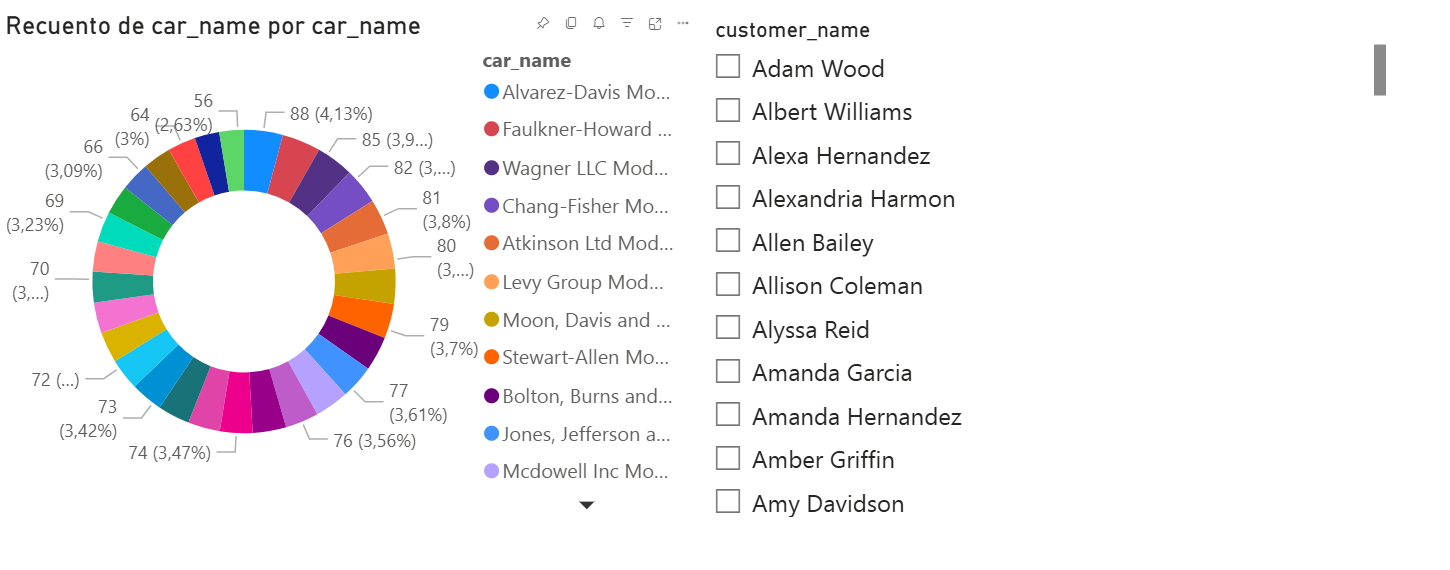

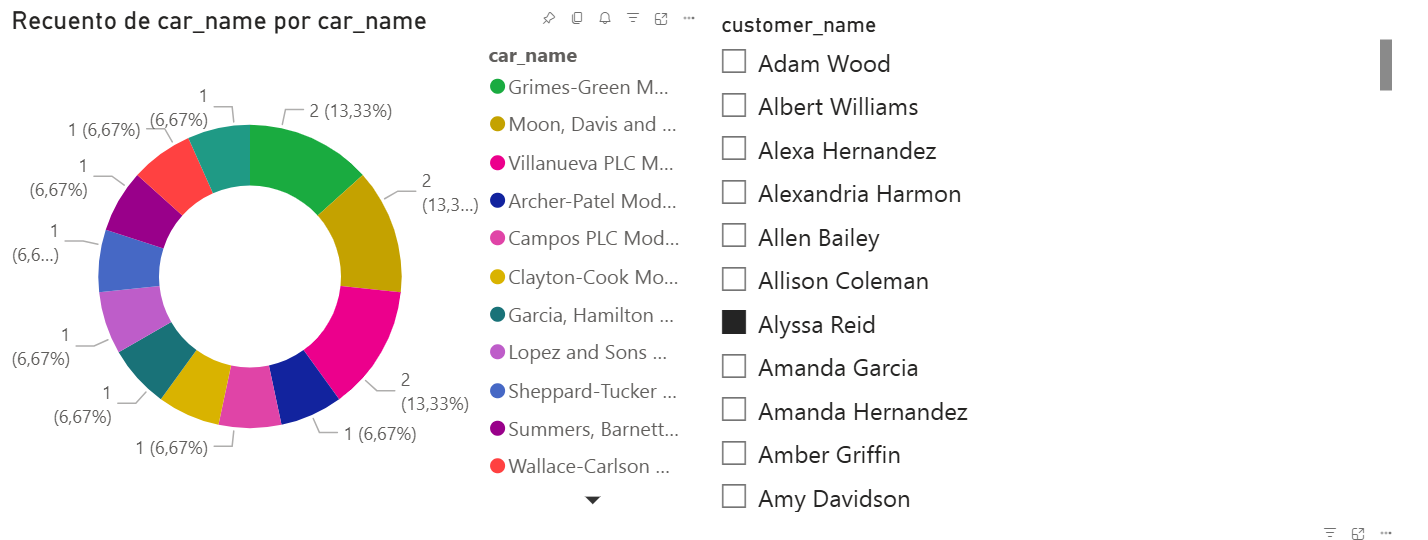
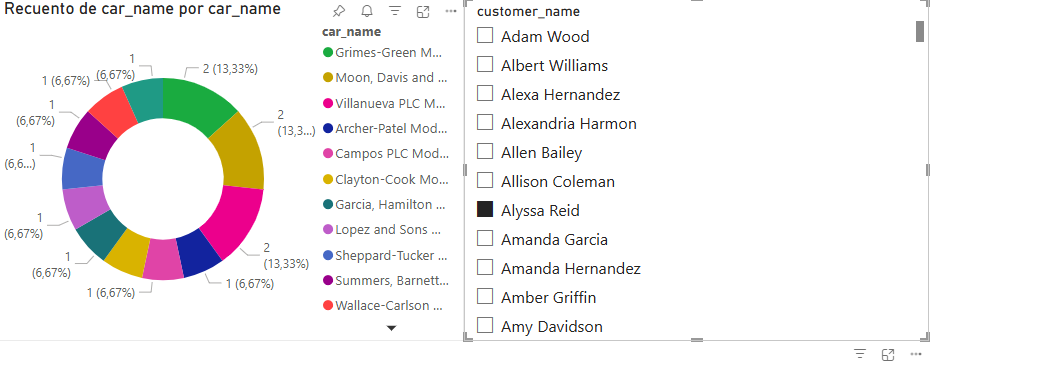